In [ ]:
!pip install seaborn --upgrade

In [429]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [430]:
df = pd.read_csv('jpred4.tsv', sep='\t')
df

,DomainID,PDB,SCOPID,SCOPClass,Length,Suprekingdom,TaxaID,TaxaName
0,d1a12a_,1a12,b.69.5.1,All beta,401,eukaryota,9606,Homo sapiens
1,d1a1xa_,1a1x,b.63.1.1,All beta,106,eukaryota,9606,Homo sapiens
2,d1a62a1,1a62,a.140.3.1,All alpha,47,bacteria,469008,Escherichia coli BL21(DE3)
3,d1a9xa1,1a9x,a.92.1.1,All alpha,153,bacteria,562,Escherichia coli
4,d1acoa1,1aco,c.8.2.1,Alpha and beta (a/b),226,eukaryota,9913,Bos taurus
...,...,...,...,...,...,...,...,...
1343,e1n13.1B,1n13,d.155.1.2,Alpha and beta (a+b),112,archaea,2190,Methanocaldococcus jannaschii
1344,e1qd6.1C,1qd6,f.4.2.1,Membrane and cell surface proteins and peptides,240,bacteria,562,Escherichia coli
1345,e1qqp.12,1qqp,b.121.4.1,All beta,216,viruses,12110,Foot-and-mouth disease virus
1346,e1qtn.1A,1qtn,c.17.1.1,Alpha and beta (a/b),152,eukaryota,9606,Homo sapiens


# Distribution of domain lengths

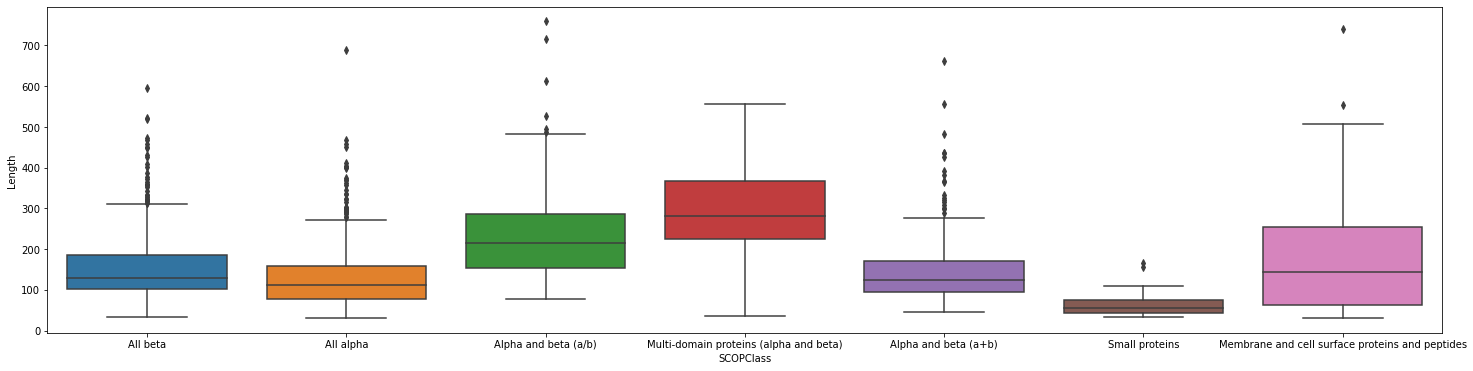

In [436]:
plt.figure(figsize=(25,6))
sns.boxplot(x = "SCOPClass",y="Length",data =df)

# Structural classification (SCOP)

In [437]:
SCOP_count = df["SCOPClass"].value_counts()
df2 = SCOP_count.rename_axis("SCOPClass").to_frame("counts")
df2

,counts
SCOPClass,
Alpha and beta (a+b),394
All alpha,354
All beta,253
Alpha and beta (a/b),199
Small proteins,57
Membrane and cell surface proteins and peptides,54
Multi-domain proteins (alpha and beta),37


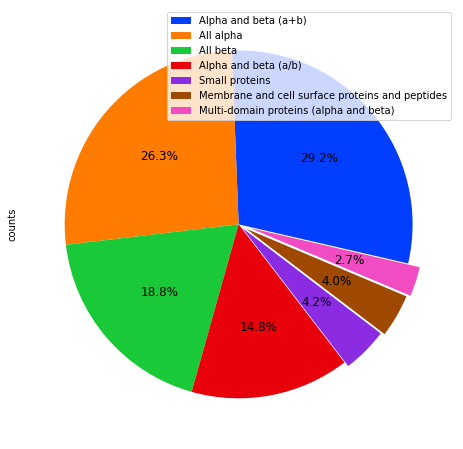

In [438]:
coldf2 = sns.color_palette("bright")
df2.plot.pie(y="counts", autopct='%1.1f%%', explode=(0.0,0,0,0.0,0.03,0.05,0.07), startangle=-13,fontsize=12, figsize=(8,8), colors=coldf2, labels= None)
plt.savefig("./train_imgs/SCOP.png")

# Comparative aminoacid composition

1.1 Entire dataset

In [440]:
length = 218421
dictio = {'A': 18387, 'C': 2908, 'E': 15539, 'D': 12678, 'G': 15818, 'F': 8585, 'I': 12434, 'H': 4897, 'K': 13105, 'M': 4690, 'L': 20473, 'N': 8775, 'Q': 8353, 'P': 9851, 'S': 12576, 'R': 11430, 'T': 11902, 'W': 2983, 'V': 15645, 'Y': 7389, 'X': 3}
tot_counts = pd.DataFrame.from_dict(dictio, orient = "index",columns=["Total Number"])
tot_counts["Amino acids"] = tot_counts.index
# tot_counts

In [ ]:
relative = tot_counts["Total Number"].div(length)
display(relative)
plt.figure(figsize=(25,15))
sns.barplot(x="Amino acids", y= "Total Number", data=relative)

In [442]:
tot_counts.sum(axis=0)

Total Number                   218421
Amino acids     ACEDGFIHKMLNQPSRTWVYX
dtype: object

## Excluding residue X

In [444]:
li=[ ['V', 'H', 5112, 77742], ['V', 'E', 6494, 48588], ['V', 'C', 4039, 92091], ['L', 'C', 6096, 92091], ['H', 'E', 1105, 48588], ['Q', 'H', 3838, 77742], ['L', 'E', 4841, 48588], ['R', 'E', 2406, 48588], ['K', 'C', 5336, 92091], ['Y', 'E', 2410, 48588], ['I', 'H', 4821, 77742], ['T', 'H', 3271, 77742], ['W', 'H', 1086, 77742], ['P', 'C', 7250, 92091], ['Y', 'C', 2470, 92091], ['T', 'C', 5405, 92091],  ['M', 'H', 2073, 77742], ['K', 'E', 2437, 48588], ['Y', 'H', 2509, 77742], ['A', 'H', 9118, 77742], ['E', 'H', 7450, 77742], ['C', 'H', 811, 77742], ['F', 'C', 2870, 92091], ['E', 'E', 2321, 48588], ['E', 'C', 5768, 92091], ['P', 'E', 1092, 48588], ['S', 'H', 3458, 77742], ['A', 'E', 3131, 48588], ['N', 'E', 1262, 48588], ['I', 'C', 2979, 92091], ['K', 'H', 5332, 77742], ['C', 'C', 1275, 92091], ['N', 'C', 5204, 92091], ['G', 'E', 2414, 48588], ['D', 'H', 3592, 77742], ['D', 'E', 1598, 48588], ['S', 'C', 6680, 92091], ['Q', 'E', 1401, 48588], ['W', 'C', 1009, 92091], ['D', 'C', 7488, 92091], ['S', 'E', 2438, 48588], ['W', 'E', 888, 48588], ['T', 'E', 3226, 48588], ['R', 'C', 4209, 92091], ['L', 'H', 9536, 77742], ['H', 'C', 2276, 92091], ['F', 'H', 3066, 77742], ['R', 'H', 4815, 77742], ['P', 'H', 1509, 77742], ['M', 'C', 1598, 92091], ['H', 'H', 1516, 77742], ['A', 'C', 6138, 92091], ['F', 'E', 2649, 48588], ['M', 'E', 1019, 48588], ['N', 'H', 2309, 77742],  ['G', 'C', 10884, 92091], ['G', 'H', 2520, 77742], ['I', 'E', 4634, 48588], ['C', 'E', 822, 48588], ['Q', 'C', 3114, 92091], ['X', 'C', 3, 92091]] # 

dictio = {'A': 18387, 'C': 2908, 'E': 15539, 'D': 12678, 'G': 15818, 'F': 8585, 'I': 12434, 'H': 4897, 'K': 13105, 'M': 4690, 'L': 20473, 'N': 8775, 'Q': 8353, 'P': 9851, 'S': 12576, 'R': 11430, 'T': 11902, 'W': 2983, 'V': 15645, 'Y': 7389, 'X': 3}
for k in dictio.keys():
    li.append([k, 'sum', dictio[k], 218421])

# print(li)

hec_tot = pd.DataFrame(li)
hec_tot.columns = ['Residue', 'SS or tot', 'Frequency', 'Total' ]
display(hec_tot)


,Residue,SS or tot,Frequency,Total
0,V,H,5112,77742
1,V,E,6494,48588
2,V,C,4039,92091
3,L,C,6096,92091
4,H,E,1105,48588
...,...,...,...,...
77,T,sum,11902,218421
78,W,sum,2983,218421
79,V,sum,15645,218421
80,Y,sum,7389,218421


In [445]:
# dividing by Total
hec_tot['Frequency'] = hec_tot['Frequency'].div(hec_tot['Total'])
hec_tot


,Residue,SS or tot,Frequency,Total
0,V,H,0.065756,77742
1,V,E,0.133654,48588
2,V,C,0.043859,92091
3,L,C,0.066195,92091
4,H,E,0.022742,48588
...,...,...,...,...
77,T,sum,0.054491,218421
78,W,sum,0.013657,218421
79,V,sum,0.071628,218421
80,Y,sum,0.033829,218421


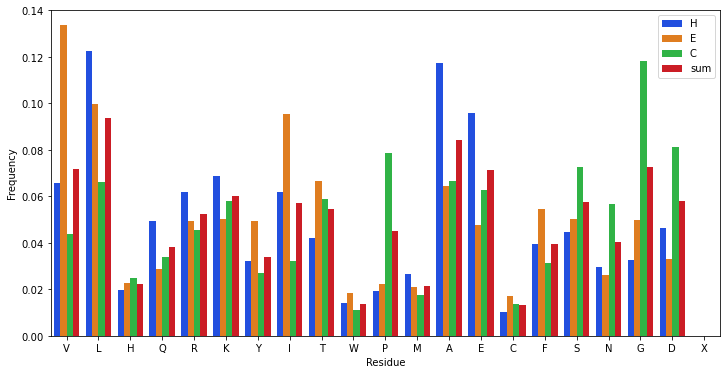

In [446]:
plt.figure(figsize=(12,6))
sns.barplot(x="Residue",y="Frequency",hue="SS or tot",data=hec_tot, palette="bright")
plt.legend(loc=1,prop={'size':10})
plt.savefig('./train_imgs/aa_dist.png')

1.2 Fraction of helix, strand and coil residues

In [ ]:
m=[ ['V', 'H', 5112, 77742], ['V', 'E', 6494, 48588], ['V', 'C', 4039, 92091], ['L', 'C', 6096, 92091], ['H', 'E', 1105, 48588], ['Q', 'H', 3838, 77742], ['L', 'E', 4841, 48588], ['R', 'E', 2406, 48588], ['K', 'C', 5336, 92091], ['Y', 'E', 2410, 48588], ['I', 'H', 4821, 77742], ['T', 'H', 3271, 77742], ['W', 'H', 1086, 77742], ['P', 'C', 7250, 92091], ['Y', 'C', 2470, 92091], ['T', 'C', 5405, 92091],  ['M', 'H', 2073, 77742], ['K', 'E', 2437, 48588], ['Y', 'H', 2509, 77742], ['A', 'H', 9118, 77742], ['E', 'H', 7450, 77742], ['C', 'H', 811, 77742], ['F', 'C', 2870, 92091], ['E', 'E', 2321, 48588], ['E', 'C', 5768, 92091], ['P', 'E', 1092, 48588], ['S', 'H', 3458, 77742], ['A', 'E', 3131, 48588], ['N', 'E', 1262, 48588], ['I', 'C', 2979, 92091], ['K', 'H', 5332, 77742], ['C', 'C', 1275, 92091], ['N', 'C', 5204, 92091], ['G', 'E', 2414, 48588], ['D', 'H', 3592, 77742], ['D', 'E', 1598, 48588], ['S', 'C', 6680, 92091], ['Q', 'E', 1401, 48588], ['W', 'C', 1009, 92091], ['D', 'C', 7488, 92091], ['S', 'E', 2438, 48588], ['W', 'E', 888, 48588], ['T', 'E', 3226, 48588], ['R', 'C', 4209, 92091], ['L', 'H', 9536, 77742], ['H', 'C', 2276, 92091], ['F', 'H', 3066, 77742], ['R', 'H', 4815, 77742], ['P', 'H', 1509, 77742], ['M', 'C', 1598, 92091], ['H', 'H', 1516, 77742], ['A', 'C', 6138, 92091], ['F', 'E', 2649, 48588], ['M', 'E', 1019, 48588], ['N', 'H', 2309, 77742],  ['G', 'C', 10884, 92091], ['G', 'H', 2520, 77742], ['I', 'E', 4634, 48588], ['C', 'E', 822, 48588], ['Q', 'C', 3114, 92091]] #['X', 'C', 3, 92091], 
corr= pd.DataFrame(m) #GAVPLIMFWYSTCNQHDEKRX
corr.columns = ['Aminoacids','SecondaryS','Correspondances', "SS_Ab"]
corr

In [ ]:
# m=[ ['V', 'H', 5112, 77742], ['V', 'E', 6494, 48588], ['V', 'C', 4039, 92091], ['L', 'C', 6096, 92091], ['H', 'E', 1105, 48588], ['Q', 'H', 3838, 77742], ['L', 'E', 4841, 48588], ['R', 'E', 2406, 48588], ['K', 'C', 5336, 92091], ['Y', 'E', 2410, 48588], ['I', 'H', 4821, 77742], ['T', 'H', 3271, 77742], ['W', 'H', 1086, 77742], ['P', 'C', 7250, 92091], ['Y', 'C', 2470, 92091], ['T', 'C', 5405, 92091],  ['M', 'H', 2073, 77742], ['K', 'E', 2437, 48588], ['Y', 'H', 2509, 77742], ['A', 'H', 9118, 77742], ['E', 'H', 7450, 77742], ['C', 'H', 811, 77742], ['F', 'C', 2870, 92091], ['E', 'E', 2321, 48588], ['E', 'C', 5768, 92091], ['P', 'E', 1092, 48588], ['S', 'H', 3458, 77742], ['A', 'E', 3131, 48588], ['N', 'E', 1262, 48588], ['I', 'C', 2979, 92091], ['K', 'H', 5332, 77742], ['C', 'C', 1275, 92091], ['N', 'C', 5204, 92091], ['G', 'E', 2414, 48588], ['D', 'H', 3592, 77742], ['D', 'E', 1598, 48588], ['S', 'C', 6680, 92091], ['Q', 'E', 1401, 48588], ['W', 'C', 1009, 92091], ['D', 'C', 7488, 92091], ['S', 'E', 2438, 48588], ['W', 'E', 888, 48588], ['T', 'E', 3226, 48588], ['R', 'C', 4209, 92091], ['L', 'H', 9536, 77742], ['H', 'C', 2276, 92091], ['F', 'H', 3066, 77742], ['R', 'H', 4815, 77742], ['P', 'H', 1509, 77742], ['M', 'C', 1598, 92091], ['H', 'H', 1516, 77742], ['A', 'C', 6138, 92091], ['F', 'E', 2649, 48588], ['M', 'E', 1019, 48588], ['N', 'H', 2309, 77742],  ['G', 'C', 10884, 92091], ['G', 'H', 2520, 77742], ['I', 'E', 4634, 48588], ['C', 'E', 822, 48588], ['Q', 'C', 3114, 92091]] #['X', 'C', 3, 92091], 

# s = "GAVPLIMFWYSTCNQHDEKR"
# new=[]
# for i in s:
#     for j in range(len(m)):
#         if m[j][0] == i:
#             new.append(m[j])
# print(new)

# sort_corr= pd.DataFrame(new) #GAVPLIMFWYSTCNQHDEKRX
# sort_corr.columns = ['Aminoacids','SS or tot','Correspondances', "SS_Ab"]
# type(sort_corr)

In [ ]:
['X', 'tot', number, ]

sort_corr["Correspondances"]=sort_corr['Correspondances'].div(sort_corr["SS_Ab"])
sort_corr

In [ ]:
# total = aaonly_df.values.tolist()
# total
sorted_total = []
for el in s:
    for i in range(len(total)):
        if total[i][1]==el:
#             print(total[i])
            sorted_total.append(total[i])

print(sorted_total)

In [ ]:
corr["Correspondances"]=corr["Correspondances"].div(corr["SS_Ab"])
corr

In [ ]:
plt.figure(figsize=(25,15))
sns.barplot(x="Aminoacids",y="Correspondances",hue="SecondaryS",data=corr,palette="YlOrRd")
plt.legend(loc=1,prop={'size':20})

In [ ]:
hec_tot

# Taxonomic classification

Superkingdom

In [447]:
Super_count = df["Suprekingdom"].value_counts()
df3 = Super_count.rename_axis("Superkingdom").to_frame("counts")
df3

,counts
Superkingdom,
bacteria,689
eukaryota,488
archaea,108
viruses,62
other/synthetic,1


In [780]:
supers = ['Bacteria', 'Eukaryota', 'Archaea', 'Viruses', 'Other']
counts = [689, 488, 108, 62, 1 ]

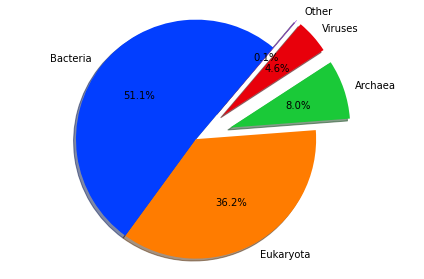

In [787]:
# Pie chart

explode = (0, 0, 0.3, 0.3, 0.3) 
col = ['#ff9999','#66b3ff','#99ff99','#ffcc99', '#ffcc98']
# col = sns.color_palette("husl", 9)
# col = sns.color_palette("pastel")
fig1, ax1 = plt.subplots()
ax1.pie(counts, explode=explode, labels=supers, shadow=True, autopct='%1.1f%%', startangle=50, colors=color)# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.tight_layout()

# plt.savefig('./train_imgs/sp.png')
plt.savefig('./train_imgs/bright.png')
plt.show()

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  """


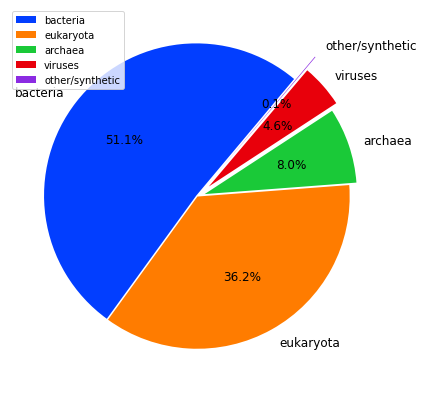

In [764]:
color=sns.color_palette("bright")
df3.plot.pie(y="counts", autopct='%1.1f%%', explode=(0.01, 0, 0.05, 0.1, 0.2),startangle=50, figsize=(7,7), fontsize=12, colors=color )#labels=None
# plt.tight_layout()
# plt.legend(loc=1,prop={'size':10})
plt.axes().set_ylabel('')

plt.savefig("./train_imgs/5kingdoms.png")

Species level (Top 5, Top 10, Top 20)

In [449]:
Species_count = df["TaxaName"].value_counts()
df4 = Species_count.rename_axis("TaxaName").to_frame("counts")
df4

,counts
TaxaName,
Homo sapiens,215
Escherichia coli,106
Bos taurus,36
Bacillus subtilis,32
Saccharomyces cerevisiae,31
...,...
Trichomonas vaginalis,1
Fusarium oxysporum,1
Pyrobaculum aerophilum str. IM2,1


,DomainID,PDB,SCOPID,SCOPClass,Length,Suprekingdom,TaxaID,TaxaName
0,d1a12a_,1a12,b.69.5.1,All beta,401,eukaryota,9606,Homo sapiens
1,d1a1xa_,1a1x,b.63.1.1,All beta,106,eukaryota,9606,Homo sapiens
2,d1a62a1,1a62,a.140.3.1,All alpha,47,bacteria,469008,Escherichia coli BL21(DE3)
3,d1a9xa1,1a9x,a.92.1.1,All alpha,153,bacteria,562,Escherichia coli
4,d1acoa1,1aco,c.8.2.1,Alpha and beta (a/b),226,eukaryota,9913,Bos taurus
...,...,...,...,...,...,...,...,...
1343,e1n13.1B,1n13,d.155.1.2,Alpha and beta (a+b),112,archaea,2190,Methanocaldococcus jannaschii
1344,e1qd6.1C,1qd6,f.4.2.1,Membrane and cell surface proteins and peptides,240,bacteria,562,Escherichia coli
1345,e1qqp.12,1qqp,b.121.4.1,All beta,216,viruses,12110,Foot-and-mouth disease virus
1346,e1qtn.1A,1qtn,c.17.1.1,Alpha and beta (a/b),152,eukaryota,9606,Homo sapiens


# Distribution of species

In [619]:
Species_count = df["TaxaName"].value_counts()
type(Species_count)
# list1 = Species_count.keys()

# inde_x = pd.DataFrame(list1)

species_df = pd.DataFrame(Species_count)
species_df["Species"]=species_df.index #["Species", "Sum"]

species_df.rename(columns = {"TaxaName":"Total"}, inplace=True) 
type(species_df)
species_df.shape
#.head(7)

(420, 2)

### Total sum

In [620]:
species_df["Total"].sum() # to check 

1348

# Top 5

In [621]:
species_df_sort = species_df.sort_values(by="Total", axis=0, ascending=False)
top5 = species_df_sort.nlargest(5, ['Total'])
display(top5)
print('sum of top 5')
print(top5['Total'].sum())
bottom_all_but5 = species_df_sort.iloc[5:420,0]
rest=bottom_all_but5.sum()
print(rest) # printing sum of the rest


,Total,Species
Homo sapiens,215,Homo sapiens
Escherichia coli,106,Escherichia coli
Bos taurus,36,Bos taurus
Bacillus subtilis,32,Bacillus subtilis
Saccharomyces cerevisiae,31,Saccharomyces cerevisiae


sum of top 5
420
928


In [622]:
print(420+928) #checks out

1348


In [623]:
top5.loc["Other"]=[928,'Other']
display(top5)

,Total,Species
Homo sapiens,215,Homo sapiens
Escherichia coli,106,Escherichia coli
Bos taurus,36,Bos taurus
Bacillus subtilis,32,Bacillus subtilis
Saccharomyces cerevisiae,31,Saccharomyces cerevisiae
Other,928,Other


In [617]:
top5.sum()

Total                                                   1348
Species    Homo sapiensEscherichia coliBos taurusBacillus...
dtype: object

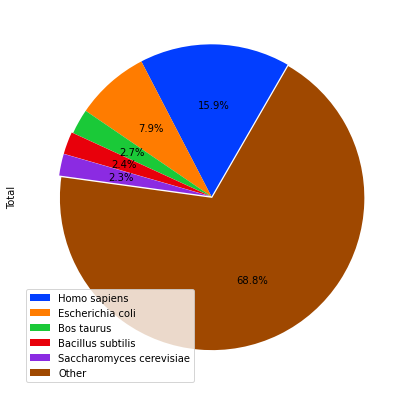

In [624]:
top5.plot.pie(y="Total", autopct='%1.1f%%',figsize=(7,7), startangle=60, colors=color,  explode=(0,0,0,0.01,0.01, 0.01), labels=None)
plt.savefig("./train_imgs/top5species.png")

# Top 10

In [641]:
top10 = species_df_sort.nlargest(10, ['Total'])
display(top10)
print('Sum of top 10: ')
print(top10['Total'].sum())

bottom_all_but_10 = species_df_sort.iloc[10:420, 0]
# display(bottom_all_but_10)
all_minus_10 = bottom_all_but_10.sum()
print('Sum of rest\n', all_minus_10)

,Total,Species
Homo sapiens,215,Homo sapiens
Escherichia coli,106,Escherichia coli
Bos taurus,36,Bos taurus
Bacillus subtilis,32,Bacillus subtilis
Saccharomyces cerevisiae,31,Saccharomyces cerevisiae
Escherichia coli K-12,29,Escherichia coli K-12
Mus musculus,28,Mus musculus
Thermotoga maritima,22,Thermotoga maritima
Thermus thermophilus HB8,19,Thermus thermophilus HB8
Thermus thermophilus,17,Thermus thermophilus


Sum of top 10: 
535
Sum of rest
 813


In [642]:
535+813

1348

In [644]:
top10.loc['Other']=[813, 'Other']
top10

,Total,Species
Homo sapiens,215,Homo sapiens
Escherichia coli,106,Escherichia coli
Bos taurus,36,Bos taurus
Bacillus subtilis,32,Bacillus subtilis
Saccharomyces cerevisiae,31,Saccharomyces cerevisiae
Escherichia coli K-12,29,Escherichia coli K-12
Mus musculus,28,Mus musculus
Thermotoga maritima,22,Thermotoga maritima
Thermus thermophilus HB8,19,Thermus thermophilus HB8
Thermus thermophilus,17,Thermus thermophilus


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


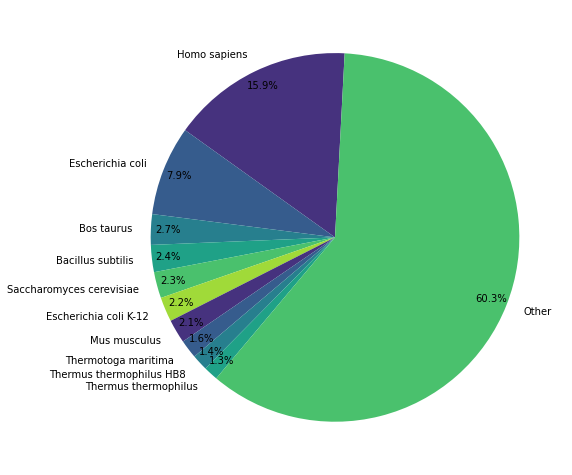

In [718]:
top10.sum() # checks out


top10.plot.pie(y='Total', autopct='%1.1f%%', explode=(0,0,0,0,0,0,0,0,0,0,0), figsize=(8,8), startangle=87, colors=c1, legend=None, pctdistance=0.91, labeldistance=1.1)
plt.axes().set_ylabel('')
# plt.xticks(rotation=30) 
# ax.set_yticklabels([])
plt.tight_layout()
plt.show
plt.savefig("./train_imgs/top10species.png")

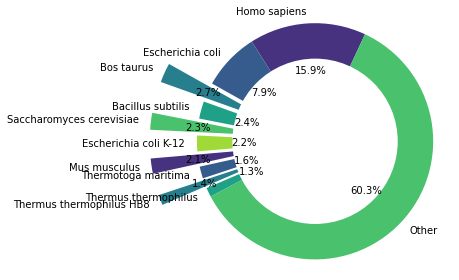

In [710]:
labels=top10['Species']
sizes = top10['Total']

fig1, ax1 = plt.subplots()
ax1.pie(sizes, colors=c1, labels=labels, autopct='%1.1f%%', startangle=65, labeldistance=1.1, explode=(0,0,0.4,0.0,0.4,0.0,0.4,0.0,0.4,0,0))

#circle
center_circ = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(center_circ)

# Aspect ratio must be drawn equal
ax1.axis('equal')
plt.tight_layout()
plt.show()

In [590]:
top20 = df4.nlargest(20, ['counts'])

,counts
TaxaName,
Homo sapiens,215
Escherichia coli,106
Bos taurus,36
Bacillus subtilis,32
Saccharomyces cerevisiae,31
Escherichia coli K-12,29
Mus musculus,28
Thermotoga maritima,22
Thermus thermophilus HB8,19


In [593]:
bottom_all_but10 = species_df_sort.iloc[10:415,0]
bottom_all_but10

Thermus thermophilus              17
Geobacillus stearothermophilus    16
Mycobacterium tuberculosis        13
Drosophila melanogaster           12
Aquifex aeolicus                  12
                                  ..
Allochromatium vinosum             1
Lactobacillus reuteri              1
Xanthomonas campestris             1
Lycodichthys dearborni             1
Zymomonas mobilis                  1
Name: Total, Length: 406, dtype: int64

In [ ]:
rest=bottom_all_but5.sum()
print(rest)
top5.loc["Other"]=[894,'Other']
display(top5)

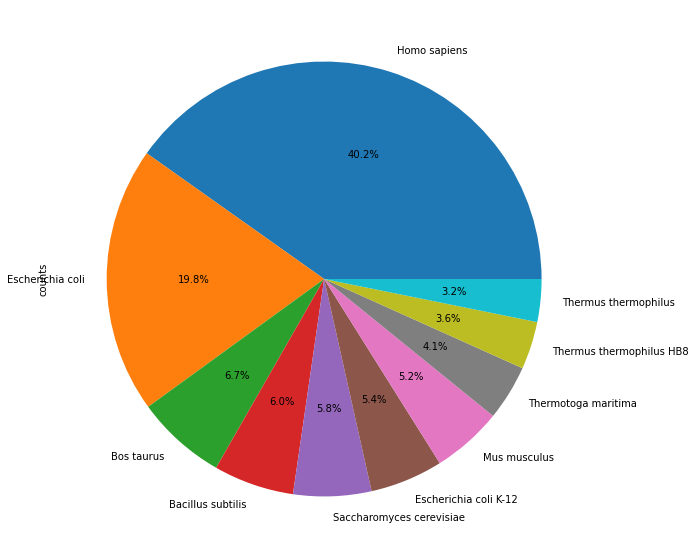

In [458]:
top10.plot.pie(y="counts", autopct='%1.1f%%',figsize=(10,10), legend=None)

In [ ]:
top20.plot.pie(y="counts", autopct='%1.1f%%',figsize=(20,10), labels= None)

# Relative abundance of secondary structure conformations

In [ ]:
length = 218421
d2={'Helix (H)': 77742, 'Coil (C)': 92091, 'Strand (E)': 48588}
ss_comp= pd.DataFrame.from_dict(d2, orient = "index",columns=["Total Number"])
ss_comp["SecondaryStructure"] = ss_comp.index
ss_comp

In [ ]:
ss_comp["Total Number"] = ss_comp["Total Number"].div(length)
ss_comp

In [ ]:
colors = sns.color_palette("bright")
c1 = sns.color_palette("viridis")
c2 = sns.color_palette("YlOrBr")
c3 = sns.color_palette('Spectral')
# colors = sns.color_palette("viridis", as_cmap=True)
# sns.color_palette("husl", 8)
# plt.figure(figsize=(20,10))
cmap = plt.get_cmap("YlOrRd")
# colors = [cmap(i) for i in np.linspace(0, 1, 4)]
ss_comp.plot.pie(y="Total Number", autopct='%1.1f%%', explode=(0.01, 0.01, 0.01), startangle=60, figsize=(6, 6), fontsize=14, colors=colors, legend=None)
# plt.legend(loc=4, prop={'size': 18})
plt.savefig("./train_imgs/HEC_andel.png")

## Compared to Uniprot December 2020

Helix: 
* Annotations: 284 077 
* Entries: **25 649**

Turn:
* Annotations: 68 593 
* Entries: **20 893**

Beta strand:
* Annotations: 293 820 
* Entries: **24 193**

[see here](https://www.uniprot.org/statistics/Swiss-Prot)

In [ ]:
uniprot={'Helix (H)': 25649, 'Coil (C)': 20893, 'Strand (E)': 24193}
ss_comp_uniprotsp= pd.DataFrame.from_dict(uniprot, orient = "index",columns=["Total"])
ss_comp_uniprotsp["SecondaryStructure"] = ss_comp.index
ss_comp_uniprotsp

In [ ]:
colors = sns.color_palette("bright")
co = sns.color_palette("Set3")
# sns.color_palette("husl", 8)
# plt.figure(figsize=(20,10))
# cmap = plt.get_cmap("YlOrRd")
# colors = [cmap(i) for i in np.linspace(0, 1, 4)]
ss_comp_uniprotsp.plot.pie(y="Total", autopct='%1.1f%%', startangle = 50, figsize=(8, 8), fontsize=14, colors=co)# legend=None)
# plt.legend(loc=4, prop={'size': 18})
plt.savefig("./train_imgs/uniprot_sp.png")

In [ ]:
sns.distplot(df["Length"])